# Ensemble Example

In [53]:
import random
import math
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
import matplotlib.pyplot as plt

In [114]:
def sigmoid(x):
    return 4 / (1+math.e**(-x)) - 2

def noise(l):
    return (random.random() - 0.5) / l



def one(x):
    return x + noise(10), abs(sigmoid(x) - x + noise(10))

def two(x):
    return 2 + noise(10), abs(sigmoid(2) - 2 + noise(10))

def three(x):
    return -2 + noise(10), abs(sigmoid(2) + 2 + noise(10))

def four(x):
    a = math.log(x)/math.log(4) + 1 if x > 0 else 0
    return a + noise(10), abs(sigmoid(x) - a + noise(10))

def five(x):
    a = -math.log(-x)/math.log(4) - 1 if x < 0 else 0
    return a + noise(10), abs(sigmoid(x) - a + noise(10))

def ensemble(x):
    return (*one(x), *two(x), *three(x), *four(x), *five(x))

In [115]:
data = []
for i in range(100_000):
    x = random.random() * 20 - 10
    data.append([x, sigmoid(x), *ensemble(x)])

In [116]:
data = np.array(data)
data

array([[-0.4971843 , -0.48718961, -0.49513542, ...,  0.49824167,
        -0.4957164 ,  0.04521027],
       [-5.39603696, -1.98194381, -5.36889018, ...,  1.99076494,
        -2.18297614,  0.21620238],
       [ 3.81122301,  1.91343058,  3.76951083, ...,  0.02808379,
        -0.01608217,  1.9113758 ],
       ...,
       [ 2.07604969,  1.5542138 ,  2.0921533 , ...,  0.03160418,
         0.01406041,  1.59322184],
       [-2.27563471, -1.62735565, -2.28082618, ...,  1.62760393,
        -1.56332799,  0.05511168],
       [-1.26371889, -1.11866252, -1.2837507 , ...,  1.07271106,
        -1.1562906 ,  0.01336416]])

In [117]:
df = pd.DataFrame(data)
df.columns = ["x", "s","one","one-e","two","two-e","three","three-e","four","four-e","five","five-e"]
df

,x,s,one,one-e,two,two-e,three,three-e,four,four-e,five,five-e
0,-0.497184,-0.487190,-0.495135,0.052962,1.980904,0.475015,-1.989405,3.527967,-0.035281,0.498242,-0.495716,0.045210
1,-5.396037,-1.981944,-5.368890,3.409932,1.978622,0.452251,-1.959405,3.527974,-0.022249,1.990765,-2.182976,0.216202
2,3.811223,1.913431,3.769511,1.934905,2.043257,0.458394,-1.955151,3.535617,1.936019,0.028084,-0.016082,1.911376
3,-6.372446,-1.993180,-6.365164,4.369909,2.007549,0.498859,-2.035699,3.479646,-0.000935,1.989871,-2.338911,0.294275
4,-4.419503,-1.952412,-4.455756,2.443009,1.959908,0.467079,-1.996855,3.543504,-0.013038,1.974887,-2.038265,0.080892
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-9.366572,-1.999658,-9.372480,7.415675,1.992126,0.484602,-2.038191,3.488608,0.014541,2.022124,-2.634629,0.591796
99996,2.753043,1.760340,2.769169,0.949547,1.970708,0.511572,-2.047858,3.526386,1.772439,0.078966,-0.039562,1.738438
99997,2.076050,1.554214,2.092153,0.570243,2.047964,0.492871,-1.991326,3.478471,1.532351,0.031604,0.014060,1.593222
99998,-2.275635,-1.627356,-2.280826,0.689162,1.991715,0.446752,-1.952368,3.522218,-0.019771,1.627604,-1.563328,0.055112


In [118]:
X = ["one","two","three","four","five"]
Y = "s"

In [119]:
trainFeaturesX, testFeaturesX = train_test_split(df[X], test_size=0.25, random_state=42)
trainY, testY = train_test_split(df[[Y]], test_size=0.25, random_state=42)

display(trainFeaturesX.T)
display(trainY.T)

,98980,69824,9928,75599,95621,80724,78925,14672,76016,95628,...,60263,44131,87498,37194,82386,6265,54886,76820,860,15795
one,-7.478078,-3.777354,-4.451394,8.786443,-5.144355,6.057148,0.212680,8.045420,4.653533,-1.241134,...,9.514680,-2.373043,-3.179619,5.294132,6.507823,7.156157,3.302149,4.832790,-6.797614,-6.143992
two,2.041005,1.999807,2.038124,2.023868,2.033276,1.994331,2.030413,2.018750,1.984303,1.982467,...,2.028749,1.992338,1.964040,1.982979,2.030476,2.003026,2.004073,1.974010,2.030342,2.006499
three,-1.990345,-2.033662,-2.012361,-1.985825,-1.956741,-1.964666,-2.045959,-1.993555,-2.040141,-1.954519,...,-1.974650,-1.982712,-1.966914,-2.021108,-1.955327,-2.032919,-1.978881,-2.042857,-2.003113,-2.042531
four,-0.036645,0.004942,-0.039788,2.605566,-0.038427,2.271623,-0.296418,2.544956,2.058783,0.035383,...,2.659680,0.011536,0.010053,2.187526,2.308784,2.417910,1.881914,2.125581,-0.041393,0.030342
five,-2.433394,-1.922579,-2.101192,-0.038506,-2.196672,0.015398,0.033754,0.043694,-0.003294,-1.200072,...,-0.038860,-1.664697,-1.858334,0.023929,-0.038368,0.009516,-0.022887,-0.033881,-2.344719,-2.299123


,98980,69824,9928,75599,95621,80724,78925,14672,76016,95628,...,60263,44131,87498,37194,82386,6265,54886,76820,860,15795
s,-1.997693,-1.908946,-1.955724,1.99936,-1.977264,1.990516,0.165225,1.998681,1.961352,-1.134337,...,1.99971,-1.669082,-1.840194,1.97937,1.994107,1.99688,1.852355,1.968931,-1.995501,-1.991532


In [120]:
mlp = Sequential()
mlp.add(Dense(8, input_dim=trainFeaturesX.shape[1], activation="relu"))
mlp.add(Dense(4, activation="relu"))
mlp.add(Dense(1, activation = "linear"))

In [121]:
opt = Adam(lr=1e-3, decay=1e-3 / 200)
mlp.compile(loss="mean_absolute_percentage_error", optimizer=opt)

In [122]:
mlp.fit(
    [trainFeaturesX], trainY,
    validation_data=([testFeaturesX], testY),
    epochs=200, batch_size=8)

Epoch 1/200
9375/9375 [==============================] - 6s 595us/step - loss: 14.1986 - val_loss: 14.5282
Epoch 2/200
9375/9375 [==============================] - 6s 596us/step - loss: 7.7060 - val_loss: 5.4277
Epoch 3/200
9375/9375 [==============================] - 6s 595us/step - loss: 8.2051 - val_loss: 9.1190
Epoch 4/200
9375/9375 [==============================] - 6s 603us/step - loss: 6.7857 - val_loss: 13.8889
Epoch 5/200
9375/9375 [==============================] - 6s 594us/step - loss: 6.3302 - val_loss: 4.7982
Epoch 6/200
9375/9375 [==============================] - 6s 596us/step - loss: 5.8573 - val_loss: 3.6149
Epoch 7/200
9375/9375 [==============================] - 6s 599us/step - loss: 6.1692 - val_loss: 3.5836
Epoch 8/200
9375/9375 [==============================] - 6s 596us/step - loss: 4.4998 - val_loss: 12.1077
Epoch 9/200
9375/9375 [==============================] - 6s 609us/step - loss: 4.9582 - val_loss: 7.2243
Epoch 10/200
9375/9375 [===========================

In [123]:
preds = mlp.predict([testFeaturesX])
diff = (preds.T[0] - testY.values.T[0])**2

print("average difference =", np.sqrt(np.average(diff)))

average difference = 0.02389235787937063


In [124]:
print(mlp.predict([testFeaturesX]).T[0][:10])

[ 2.0040603e+00  1.6646211e+00 -9.3197483e-01 -1.9674338e+00
  1.9688613e+00 -1.9182318e+00  5.5834967e-01  1.9716759e+00
  1.5897735e-03  7.5004584e-01]


In [125]:
print(testY.values.T[0][:10])

[ 1.99850732  1.65297961 -0.94679594 -1.99971157  1.97603988 -1.91776069
  0.56397422  1.97432241  0.00555755  0.73461404]


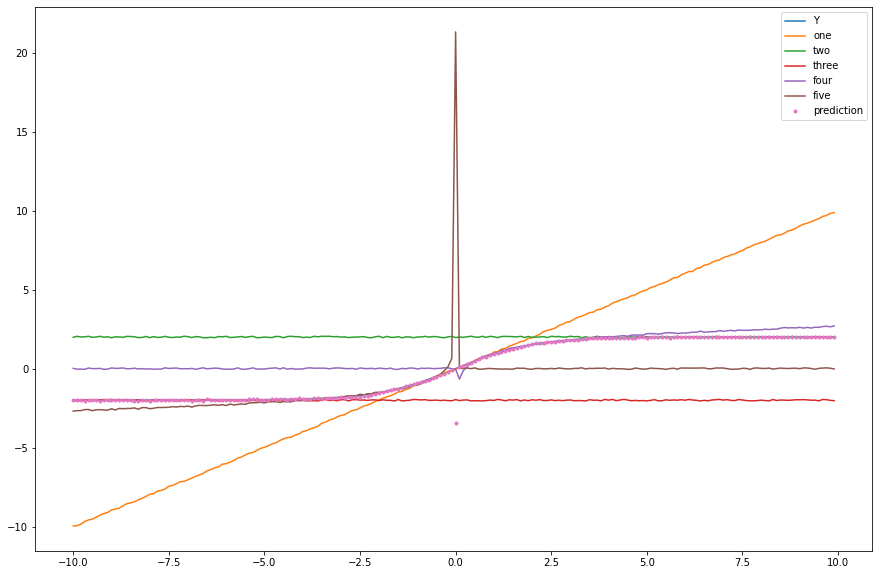

In [126]:
x_data = np.arange(-10, 10, 0.1)

fig, ax = plt.subplots(figsize=(15,10))

plt.plot(x_data, sigmoid(x_data), label="Y")

ax.plot(x_data, [one(x)[0] for x in x_data], label="one")
ax.plot(x_data, [two(x)[0] for x in x_data], label="two")
ax.plot(x_data, [three(x)[0] for x in x_data], label="three")
ax.plot(x_data, [four(x)[0] for x in x_data], label="four")
ax.plot(x_data, [five(x)[0] for x in x_data], label="five")

ax.plot(x_data, [mlp.predict([ensemble(x)[::2]])[0][0] for x in x_data], '.', label="prediction")
ax.legend()